# Child Marriage Data Cleaning

## Why did we pick child marriage as a variable to explain adult female literacy rates?

Looking at the five countries with the lowest percentage of adult female literacy within the cleaned adult female literacy dataset, apart from Afghanistan, they all rank in the top 9 countries for child marriage prevalence ([source](https://www.statista.com/statistics/1226532/countries-with-the-highest-child-marriage-rate/)). None of the top five countries are included within the list of countries with the highest child marriage rate.

Furthermore “The most recent estimates indicate that the highest prevalence of child marriage is in Sub-Saharan Africa at 37%" ([source](https://www.unfpa.org/sites/default/files/resource-pdf/Child-marriage-evidence-report-2021.pdf)). Apart from Afghanistan, the countries with the lowest adult female literacy rates are situated within Sub-Saharan Africa." 

We chose to look at child marriage as a variable that might influence adult female literacy rate as:
* “When a girl gets married, she is often expected to drop out of school, ending her formal education.” 
* “A girl is more likely to drop out of school during the preparatory time before her marriage or shortly after.”
* “As a wife or mother, she is often expected to take care of the home, children and extended family.”
* "Child marriage is rooted in gender inequality and disproportionately affects girls." <br>

All quotes above are from this [source](https://www.girlsnotbrides.org/learning-resources/child-marriage-and-education/).

Furthermore, there was a study ([source](https://files.eric.ed.gov/fulltext/EJ797610.pdf)) which investigated the reasons for low adult female literacy rate in India. “Each female was asked to cite a minimum of three main factors for not attending formal schooling in early childhood, for not enrolling their children in schools, as well as not attending an adult education program.” One of the factors was “early marriages as per their social custom”

## Plan of Action:
Explore, clean the data, and:
* Get the **current** child marriage rate for the five countries with the lowest adult female literacy rates.<br>
* Get the **current** child marriage rate for the five countries with the highest adult female literacy rates.<br>


## Data Source
The child marriage dataset is derived from the UNICEF Data Warehouse ([here](https://data.unicef.org/resources/data_explorer/unicef_f/?ag=UNICEF&df=GLOBAL_DATAFLOW&ver=1.0&dq=.PT_F_20-24_MRD_U15+PT_M_20-24_MRD_U18+PT_F_20-24_MRD_U18+PT_M_15-19_MRD+PT_F_15-19_MRD..&startPeriod=2016&endPeriod=2022))
The raw data is available in "2.unclean-child-marriage.xlsx"

The unclean dataset is comprised of five indicators:
* Percentage of girls aged 15-19 years who are currently married or in union;
* Percentage of women (aged 20-24 years) married or in union before age 15;
* Percentage of women (aged 20-24 years) married or in union before age 18;
* Percentage of boys aged 15-19 years who are currently married or in union;
* Percentage of men (aged 20-24 years) married or in union before age 18.

Therefore, child marriage can be described as being married or in union before the age of 18.

## Exploration/Dealing with Missing Data

First, we must import the packages:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Then read in the data (xlsx file) into a new variable called 'df':

In [2]:
df = pd.read_excel("2.unclean-child-marriage.xlsx", index_col=None) # must pip3 install openpyxl for this to work
df

,Geographic area,Indicator,Sex,TIME_PERIOD,OBS_VALUE,Unit multiplier,Unit of measure,Observation Status,Observation confidentaility,LOWER_BOUND,...,WGTD_SAMPL_SIZE,OBS_FOOTNOTE,SERIES_FOOTNOTE,DATA_SOURCE,SOURCE_LINK,CUSTODIAN,Time period activity related to when the data are collected,REF_PERIOD,COVERAGE_TIME,Current age
0,Afghanistan,Percentage of girls aged 15-19 years who are c...,Total,2017,16.300,NaN,%,Reported,Free,NaN,...,NaN,NaN,NaN,ALCS 2016-17,NaN,NaN,End of fieldwork,NaN,2016-17,15 to 19 years old
1,Afghanistan,Percentage of women (aged 20-24 years) married...,Total,2017,4.201,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,LCS 2016-17,NaN,NaN,End of fieldwork,NaN,2016-17,20 to 24 years old
2,Afghanistan,Percentage of women (aged 20-24 years) married...,Total,2017,28.257,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,LCS 2016-17,NaN,NaN,End of fieldwork,NaN,2016-17,20 to 24 years old
3,Albania,Percentage of girls aged 15-19 years who are c...,Total,2018,6.687,NaN,%,Reported,Free,NaN,...,NaN,NaN,NaN,DHS 2017-18,NaN,NaN,End of fieldwork,NaN,2017-18,15 to 19 years old
4,Albania,Percentage of women (aged 20-24 years) married...,Total,2018,1.387,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,DHS 2017-18,NaN,NaN,End of fieldwork,NaN,2017-18,20 to 24 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,Zimbabwe,Percentage of girls aged 15-19 years who are c...,Total,2019,21.200,NaN,%,Reported,Free,NaN,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,End of fieldwork,NaN,2019,15 to 19 years old
438,Zimbabwe,Percentage of women (aged 20-24 years) married...,Total,2019,5.418,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,End of fieldwork,NaN,2019,20 to 24 years old
439,Zimbabwe,Percentage of women (aged 20-24 years) married...,Total,2019,33.658,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,End of fieldwork,NaN,2019,20 to 24 years old
440,Zimbabwe,Percentage of boys aged 15-19 years who are cu...,Total,2019,0.700,NaN,%,Reported,Free,NaN,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,End of fieldwork,NaN,2019,15 to 19 years old


In [3]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns within the DataFrame")

There are 442 rows and 21 columns within the DataFrame


From the table above, you can see that some countries have multiple rows due to having many different observed values (OBS_VALUE). <br>

In [4]:
df.describe()

,TIME_PERIOD,OBS_VALUE,Unit multiplier,LOWER_BOUND,UPPER_BOUND,WGTD_SAMPL_SIZE,SERIES_FOOTNOTE,SOURCE_LINK,CUSTODIAN,REF_PERIOD
count,442.000000,442.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2018.626697,9.527387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.707264,10.734563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2018.000000,1.707000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2019.000000,5.462000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2020.000000,13.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022.000000,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some of the numeric columns have only NaN/null values. <br>
The TIME_PERIOD and OBS_VALUE column have values.<br>
The minimum year within the df is 2016.<br>
The maximum year within the df is 2022.<br>
The global mean percentage of child marriage is 9.52%.<br>
The maximum percentage of child marriage (including males and females) recorded was 61%.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 21 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Geographic area                                              442 non-null    object 
 1   Indicator                                                    442 non-null    object 
 2   Sex                                                          442 non-null    object 
 3   TIME_PERIOD                                                  442 non-null    int64  
 4   OBS_VALUE                                                    442 non-null    float64
 5   Unit multiplier                                              0 non-null      float64
 6   Unit of measure                                              442 non-null    object 
 7   Observation Status                                           442 non-null    obj

From the output above, you can see that some columns are full of missing data, and some are full of data. <br>
Two columns ("Observation confidentaility" and "OBS_FOOTNOTE) are partially missing data.


We can visualise where the missing data is within the dataset using a missing data histogram, created using seaborn. <br>

[Text(0.5, 1.0, 'Missing data heatmap'),
 Text(0.5, 23.52222222222222, 'Column name'),
 Text(50.722222222222214, 0.5, 'Row index')]

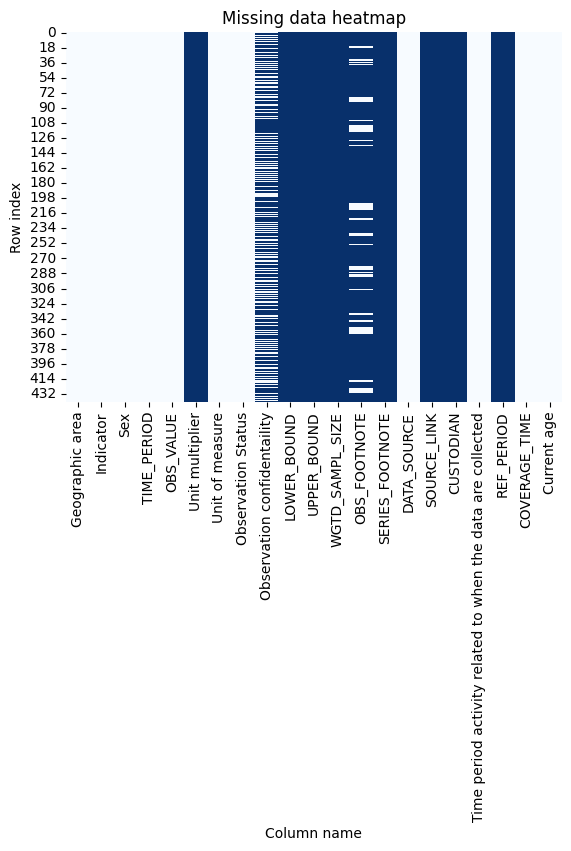

In [6]:

sns.heatmap(df.isnull(), cbar=False, cmap="Blues").set(title="Missing data heatmap", \
                                                            xlabel = "Column name", ylabel="Row index")

As you can see from the heatmap above, under half of the columns are made up of only null values (null values are shaded in blue).<br>
There is approximately equal counts of null data to non-null data within the "Observation confidentaility" column. <br>
OBS_FOOTNOTE has less null values compared to the "Observation confidentaility" column.

## Cleaning the DataFrame

Since we are only focused on females, the next step is to remove men/boys from the dataset:

First see what the different categories are called in the rows of "Indicator":

In [7]:
df.Indicator.unique() # get all the unique values within the Indicator column

array(['Percentage of girls aged 15-19 years who are currently married or in union',
       'Percentage of women (aged 20-24 years) married or in union before age 15',
       'Percentage of women (aged 20-24 years) married or in union before age 18',
       'Percentage of boys aged 15-19 years who are currently married or in union',
       'Percentage of men (aged 20-24 years) married or in union before age 18'],
      dtype=object)

Then look at the output above to remove unwanted rows from the 'df' variable:

In [8]:
df = df[(df.Indicator != "Percentage of boys aged 15-19 years who are currently married or in union") \
         & (df.Indicator != "Percentage of men (aged 20-24 years) married or in union before age 18")]
df

,Geographic area,Indicator,Sex,TIME_PERIOD,OBS_VALUE,Unit multiplier,Unit of measure,Observation Status,Observation confidentaility,LOWER_BOUND,...,WGTD_SAMPL_SIZE,OBS_FOOTNOTE,SERIES_FOOTNOTE,DATA_SOURCE,SOURCE_LINK,CUSTODIAN,Time period activity related to when the data are collected,REF_PERIOD,COVERAGE_TIME,Current age
0,Afghanistan,Percentage of girls aged 15-19 years who are c...,Total,2017,16.300,NaN,%,Reported,Free,NaN,...,NaN,NaN,NaN,ALCS 2016-17,NaN,NaN,End of fieldwork,NaN,2016-17,15 to 19 years old
1,Afghanistan,Percentage of women (aged 20-24 years) married...,Total,2017,4.201,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,LCS 2016-17,NaN,NaN,End of fieldwork,NaN,2016-17,20 to 24 years old
2,Afghanistan,Percentage of women (aged 20-24 years) married...,Total,2017,28.257,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,LCS 2016-17,NaN,NaN,End of fieldwork,NaN,2016-17,20 to 24 years old
3,Albania,Percentage of girls aged 15-19 years who are c...,Total,2018,6.687,NaN,%,Reported,Free,NaN,...,NaN,NaN,NaN,DHS 2017-18,NaN,NaN,End of fieldwork,NaN,2017-18,15 to 19 years old
4,Albania,Percentage of women (aged 20-24 years) married...,Total,2018,1.387,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,DHS 2017-18,NaN,NaN,End of fieldwork,NaN,2017-18,20 to 24 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Zambia,Percentage of women (aged 20-24 years) married...,Total,2018,5.166,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,DHS 2018,NaN,NaN,End of fieldwork,NaN,2018,20 to 24 years old
434,Zambia,Percentage of women (aged 20-24 years) married...,Total,2018,29.016,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,DHS 2018,NaN,NaN,End of fieldwork,NaN,2018,20 to 24 years old
437,Zimbabwe,Percentage of girls aged 15-19 years who are c...,Total,2019,21.200,NaN,%,Reported,Free,NaN,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,End of fieldwork,NaN,2019,15 to 19 years old
438,Zimbabwe,Percentage of women (aged 20-24 years) married...,Total,2019,5.418,NaN,%,Reported,NaN,NaN,...,NaN,NaN,NaN,MICS 2019,NaN,NaN,End of fieldwork,NaN,2019,20 to 24 years old


Check that the unwanted rows are not in the 'df' variable:

In [9]:
df.Indicator.unique()

array(['Percentage of girls aged 15-19 years who are currently married or in union',
       'Percentage of women (aged 20-24 years) married or in union before age 15',
       'Percentage of women (aged 20-24 years) married or in union before age 18'],
      dtype=object)

To tidy things up, I want to get rid of all the columns apart from the country and OBS_VALUE (observed value) column.
All of the columns we are getting rid of are unnecessary for our study. 
This also removes the columns that contain all/some null values.

We don't need to worry about filtering the TIME_PERIOD column first as all the values are within our year-range. <br>
Note: the TIME_PERIOD column does not go from 2000 like the literacy dataset, the child marriage dataset goes from 2016.

In [10]:
to_drop = df.loc[:, "Indicator": "TIME_PERIOD"] # drop all columns between (and including) the column with 'Indicator' and the column "TIME_PERIOD". 

df.drop(to_drop, inplace=True, axis=1) 

/var/folders/_9/gp8pyggs20564zr2z95ttnnm0000gn/T/ipykernel_50138/3691588634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(to_drop, inplace=True, axis=1)


In [11]:
df

,Geographic area,OBS_VALUE,Unit multiplier,Unit of measure,Observation Status,Observation confidentaility,LOWER_BOUND,UPPER_BOUND,WGTD_SAMPL_SIZE,OBS_FOOTNOTE,SERIES_FOOTNOTE,DATA_SOURCE,SOURCE_LINK,CUSTODIAN,Time period activity related to when the data are collected,REF_PERIOD,COVERAGE_TIME,Current age
0,Afghanistan,16.300,NaN,%,Reported,Free,NaN,NaN,NaN,NaN,NaN,ALCS 2016-17,NaN,NaN,End of fieldwork,NaN,2016-17,15 to 19 years old
1,Afghanistan,4.201,NaN,%,Reported,NaN,NaN,NaN,NaN,NaN,NaN,LCS 2016-17,NaN,NaN,End of fieldwork,NaN,2016-17,20 to 24 years old
2,Afghanistan,28.257,NaN,%,Reported,NaN,NaN,NaN,NaN,NaN,NaN,LCS 2016-17,NaN,NaN,End of fieldwork,NaN,2016-17,20 to 24 years old
3,Albania,6.687,NaN,%,Reported,Free,NaN,NaN,NaN,NaN,NaN,DHS 2017-18,NaN,NaN,End of fieldwork,NaN,2017-18,15 to 19 years old
4,Albania,1.387,NaN,%,Reported,NaN,NaN,NaN,NaN,NaN,NaN,DHS 2017-18,NaN,NaN,End of fieldwork,NaN,2017-18,20 to 24 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,Zambia,5.166,NaN,%,Reported,NaN,NaN,NaN,NaN,NaN,NaN,DHS 2018,NaN,NaN,End of fieldwork,NaN,2018,20 to 24 years old
434,Zambia,29.016,NaN,%,Reported,NaN,NaN,NaN,NaN,NaN,NaN,DHS 2018,NaN,NaN,End of fieldwork,NaN,2018,20 to 24 years old
437,Zimbabwe,21.200,NaN,%,Reported,Free,NaN,NaN,NaN,NaN,NaN,MICS 2019,NaN,NaN,End of fieldwork,NaN,2019,15 to 19 years old
438,Zimbabwe,5.418,NaN,%,Reported,NaN,NaN,NaN,NaN,NaN,NaN,MICS 2019,NaN,NaN,End of fieldwork,NaN,2019,20 to 24 years old


In [12]:
to_drop = df.loc[:,"Unit multiplier":"Current age"] # drop all columns between (and including) the column with 'Unit multiplier' and the column 'Current age'. 

df.drop(to_drop, inplace=True, axis=1) 

/var/folders/_9/gp8pyggs20564zr2z95ttnnm0000gn/T/ipykernel_50138/1413574551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(to_drop, inplace=True, axis=1)


In [13]:
df

,Geographic area,OBS_VALUE
0,Afghanistan,16.300
1,Afghanistan,4.201
2,Afghanistan,28.257
3,Albania,6.687
4,Albania,1.387
...,...,...
433,Zambia,5.166
434,Zambia,29.016
437,Zimbabwe,21.200
438,Zimbabwe,5.418


Now, we will narrow down the countries to the countries that have the five highest and lowest adult female literacy rates.

In [14]:
literacy = pd.read_csv("1.first-table-clean-female-literacy.csv")
literacy

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%)
0,Chad,TCD,Lowest,15.379128
1,Afghanistan,AFG,Lowest,19.809310
2,Mali,MLI,Lowest,20.470424
3,Niger,NER,Lowest,20.530956
4,Guinea,GIN,Lowest,22.271088
5,Cuba,CUB,Highest,99.769315
6,Lithuania,LTU,Highest,99.777059
7,Estonia,EST,Highest,99.849846
8,Latvia,LVA,Highest,99.858515
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612


However, when looking at the table above, I think that North Korea might be named different in the child marriage dataset.<br>
I would like to check this first.


In [15]:
df_s = pd.Series(df["Geographic area"]) # need to make a series to use regex
cm_korea = list(df_s[df_s.str.contains('Korea', regex= True)].unique()) # use regex to look for value with "Korea" in it
# I made the new variable a list to make it easy to replace with .replace() later
cm_korea

["Democratic People's Republic of Korea"]

From the output above, you can see that the name for North Korea is different in the child marriage dataset. This will be a problem when we come to join the tables together. <br>
Therefore, we need to change the value within the child marriage DataFrame to match the clean female literacy DataFrame.


First create a list with the desired name for North Korea:

In [16]:
countries_in_literacy = pd.Series(literacy["Country Name"]) # need to make a series to use regex
fl_korea = list(countries_in_literacy[countries_in_literacy.str.contains('Korea', regex=True)].unique()) # use regex to look for value with "Korea" in it
# I made the new variable a list to make it easy to replace with .replace() later
fl_korea

["Korea, Dem. People's Rep."]

Replace "Democratic People's Republic of Korea" with "Korea, Dem. People's Rep." in the child marriage dataset to match the adult female literacy dataset.

In [17]:
df = df.replace(cm_korea, fl_korea) # replace the name for North Korea in the child marriage dataset with the name for North Korea in the literacy dataset

Look in the DataFrame and check that the changes have been made:

In [18]:
str_korea = str(fl_korea)[2:-2] # I created a string variable with the target name for Korea. I did this so I didn't have to write out the full name for North Korea below.
# Splicing is required to get rid of square brackets and additional quotation marks.

df[df["Geographic area"]==str_korea] # check if changes successfully using the string

,Geographic area,OBS_VALUE
97,"Korea, Dem. People's Rep.",0.0
98,"Korea, Dem. People's Rep.",0.1


From the output above, we can see that the changes were successful!

Now, we can get back to narrowing down the countries to the countries that have the five highest and lowest adult female literacy rates.

In [19]:
df_c = df.copy() # create a copy to play around with in case we need to access all the countries' data later
df_c = df_c[df_c["Geographic area"].isin(list(countries_in_literacy))] # get all the countries in the child marriage dataset that are also in the female literacy dataset
df_c

,Geographic area,OBS_VALUE
0,Afghanistan,16.300
1,Afghanistan,4.201
2,Afghanistan,28.257
71,Chad,24.556
72,Chad,24.200
73,Chad,60.600
87,Cuba,12.362
88,Cuba,4.800
89,Cuba,29.400
97,"Korea, Dem. People's Rep.",0.000


Should we use the mean or median to get one value per country?

Text(0, 0.5, 'Child Marriage Rate (%)')

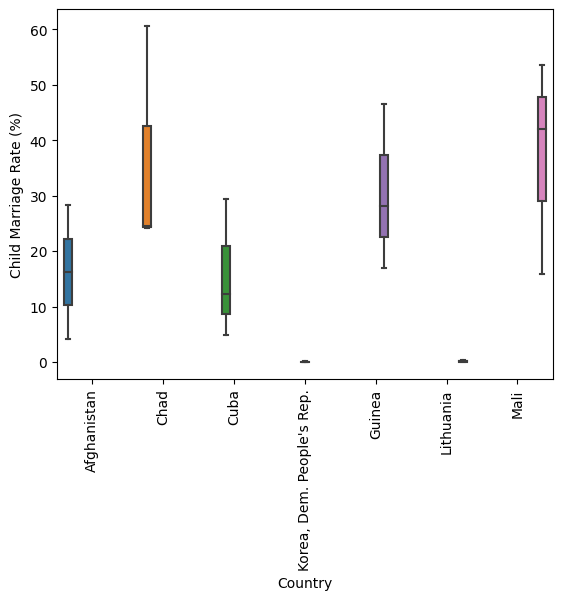

In [20]:
scatter = sns.boxplot(data=df_c, x="Geographic area", y = "OBS_VALUE", hue="Geographic area")
plt.legend([],[], frameon=False) # remove legend
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Child Marriage Rate (%)")

It looks like most of our target countries have a relatively high spread of data.
Chad is right-skewed.

Furthermore, we can check if the median and mean are different:

In [21]:
df_c_median = pd.DataFrame(df_c.groupby("Geographic area")["OBS_VALUE"].median()).reset_index()
df_c_median = df_c_median.rename(columns={"OBS_VALUE":"Median Female Child Marriage Rate (%)"})

In [22]:
df_c_mean=pd.DataFrame(df_c.groupby("Geographic area")["OBS_VALUE"].mean()).reset_index()
df_c_mean = df_c_mean.rename(columns={"OBS_VALUE":"Mean Female Child Marriage Rate (%)"})

Some of the median values are quite different from the mean values (e.g. 24.46% vs 36.45%).

Therefore, we chose to use the median female child marriage as "The median is less affected by outliers and skewed data than the mean and is usually the preferred measure of central tendency when the distribution is not symmetrical." ([source](https://www.abs.gov.au/statistics/understanding-statistics/statistical-terms-and-concepts/measures-central-tendency#:~:text=The%20median%20is%20less%20affected,the%20distribution%20is%20not%20symmetrical.))

Rename the column names to make them more descriptive, and to allow easy merging with the clean female literacy DataFrame:

In [23]:
df_c_median = df_c_median.rename(columns={"Geographic area":"Country Name"})
df_c_median

,Country Name,Median Female Child Marriage Rate (%)
0,Afghanistan,16.300
1,Chad,24.556
2,Cuba,12.362
3,Guinea,28.100
4,"Korea, Dem. People's Rep.",0.050
5,Lithuania,0.150
6,Mali,42.100


Merge the clean adult female literacy dataset with the narrowed-down median female child marriage dataset:

In [24]:
cm_fl = pd.merge(literacy, df_c_median, left_on="Country Name", right_on="Country Name", how="outer")
cm_fl

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%)
0,Chad,TCD,Lowest,15.379128,24.556
1,Afghanistan,AFG,Lowest,19.809310,16.300
2,Mali,MLI,Lowest,20.470424,42.100
3,Niger,NER,Lowest,20.530956,NaN
4,Guinea,GIN,Lowest,22.271088,28.100
5,Cuba,CUB,Highest,99.769315,12.362
6,Lithuania,LTU,Highest,99.777059,0.150
7,Estonia,EST,Highest,99.849846,NaN
8,Latvia,LVA,Highest,99.858515,NaN
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.050


From the above table, you can see that there are three countries that have missing data for the median female child marriage rate.

We could fill in the gaps with the median of the region that the country is situated within (i.e., use the median child marriage rate within Sub-Saharan Africa for Niger). <br>
This is our best bet as (to the best of our knowledge) there are no more literacy datasets online to fill in the nulls. 

Next, we will see what regions are available for Europe and Africa:

In [25]:
c_series = pd.Series(df["Geographic area"].unique()) # make a series to use the regex on
europe = c_series[c_series.str.contains("Europe", regex=True)] # find all regions with 'Europe' in the name
list(europe)


['Eastern Europe and Central Asia', 'Europe and Central Asia']

We could use the value for Eastern Europe and Central Asia to represent Latvia and Estonia (these countries are classified as eastern Europe according to the [United Nations](https://www.un.org/dgacm/en/content/regional-groups)).

In [26]:
africa = c_series[c_series.str.contains("Africa", regex=True)]
list(africa)

['Central African Republic',
 'Eastern and Southern Africa',
 'Middle East and North Africa',
 'South Africa',
 'Sub-Saharan Africa',
 'West and Central Africa']

We could use the value for Sub-Saharan Africa to represent Niger (Niger is situated within sub-Saharan Africa according to the [World Bank](https://openknowledge.worldbank.org/pages/focus-sub-saharan-africa)).

Get the median for each of the two target regions:

In [27]:
regions = df[(df["Geographic area"]=="Sub-Saharan Africa") | (df["Geographic area"]=="Eastern Europe and Central Asia")]\
  .groupby("Geographic area")["OBS_VALUE"].median()
regions = pd.DataFrame(regions).reset_index()
regions

,Geographic area,OBS_VALUE
0,Eastern Europe and Central Asia,4.8805
1,Sub-Saharan Africa,21.1555


Extract/separate the values from the DataFrame for the two regions above. <br> 
We need to extract the values in order to replace the NaN values for Niger, Latvia, and Estonia in the main merged DataFrame.

In [28]:
e_europe_median_val = float(regions[regions["Geographic area"]=="Eastern Europe and Central Asia"]["OBS_VALUE"].values)
e_europe_median_val

4.8805

In [29]:
sub_saharan_afr_median_val = float(regions[regions["Geographic area"]=="Sub-Saharan Africa"]["OBS_VALUE"].values)
sub_saharan_afr_median_val

21.155500000000004

We can now replace the NaNs with the region's mean value. <br>

First, get the row index for Niger. <br>
Then we can use this index number to switch the value to the float in the sub_saharan_afr_median_val variable above. 

In [30]:
cm_fl[cm_fl["Country Name"]=="Niger"].index

Index([3], dtype='int64')

Niger is at index 3.

Switch the current value at index 3 in the "Median Female Child Marriage Rate (%)" column to the float in the sub_saharan_afr_median_val variable:

In [31]:
cm_fl.at[3,"Median Female Child Marriage Rate (%)"]=sub_saharan_afr_median_val

cm_fl

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%)
0,Chad,TCD,Lowest,15.379128,24.5560
1,Afghanistan,AFG,Lowest,19.809310,16.3000
2,Mali,MLI,Lowest,20.470424,42.1000
3,Niger,NER,Lowest,20.530956,21.1555
4,Guinea,GIN,Lowest,22.271088,28.1000
5,Cuba,CUB,Highest,99.769315,12.3620
6,Lithuania,LTU,Highest,99.777059,0.1500
7,Estonia,EST,Highest,99.849846,NaN
8,Latvia,LVA,Highest,99.858515,NaN
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.0500


From the above table, we can see the value was inputted successfully.

Now we will do the same for Latvia:

In [32]:
cm_fl[cm_fl["Country Name"]=="Latvia"].index

Index([8], dtype='int64')

Latvia is at index 8.

Switch the value at index 8 to the float within the e_europe_median_val variable:

In [33]:
cm_fl.at[8,"Median Female Child Marriage Rate (%)"]=e_europe_median_val

cm_fl

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%)
0,Chad,TCD,Lowest,15.379128,24.5560
1,Afghanistan,AFG,Lowest,19.809310,16.3000
2,Mali,MLI,Lowest,20.470424,42.1000
3,Niger,NER,Lowest,20.530956,21.1555
4,Guinea,GIN,Lowest,22.271088,28.1000
5,Cuba,CUB,Highest,99.769315,12.3620
6,Lithuania,LTU,Highest,99.777059,0.1500
7,Estonia,EST,Highest,99.849846,NaN
8,Latvia,LVA,Highest,99.858515,4.8805
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.0500


Now for Estonia:

In [34]:
cm_fl[cm_fl["Country Name"]=="Estonia"].index

Index([7], dtype='int64')

Estonia is at index 7.

Switch the value at index 7 to the float within the e_europe_median_val variable:

In [35]:
cm_fl.at[7,"Median Female Child Marriage Rate (%)"]=e_europe_median_val

cm_fl

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%)
0,Chad,TCD,Lowest,15.379128,24.5560
1,Afghanistan,AFG,Lowest,19.809310,16.3000
2,Mali,MLI,Lowest,20.470424,42.1000
3,Niger,NER,Lowest,20.530956,21.1555
4,Guinea,GIN,Lowest,22.271088,28.1000
5,Cuba,CUB,Highest,99.769315,12.3620
6,Lithuania,LTU,Highest,99.777059,0.1500
7,Estonia,EST,Highest,99.849846,4.8805
8,Latvia,LVA,Highest,99.858515,4.8805
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.0500


We now have a populated column for median female child marriage rate (%).

## Visualising the Data

Using the same code from the female literacy data cleaning Jupyter Notebook:

In [36]:
final_df = cm_fl.copy() # make a copy of the new DataFrame with the same variable name used to make the graphs previously
final_df

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%)
0,Chad,TCD,Lowest,15.379128,24.5560
1,Afghanistan,AFG,Lowest,19.809310,16.3000
2,Mali,MLI,Lowest,20.470424,42.1000
3,Niger,NER,Lowest,20.530956,21.1555
4,Guinea,GIN,Lowest,22.271088,28.1000
5,Cuba,CUB,Highest,99.769315,12.3620
6,Lithuania,LTU,Highest,99.777059,0.1500
7,Estonia,EST,Highest,99.849846,4.8805
8,Latvia,LVA,Highest,99.858515,4.8805
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.0500


In [37]:
code_to_name = ""

for row in range(0,len(final_df["Country Code"])):
    code_to_name += f"{final_df['Country Code'][row]}: {final_df['Country Name'][row]}\n"
   
print(code_to_name) # need to use print command, otherwise it'll put everything on one line

TCD: Chad
AFG: Afghanistan
MLI: Mali
NER: Niger
GIN: Guinea
CUB: Cuba
LTU: Lithuania
EST: Estonia
LVA: Latvia
PRK: Korea, Dem. People's Rep.



Text(0.92, 0.5, "TCD: Chad\nAFG: Afghanistan\nMLI: Mali\nNER: Niger\nGIN: Guinea\nCUB: Cuba\nLTU: Lithuania\nEST: Estonia\nLVA: Latvia\nPRK: Korea, Dem. People's Rep.\n")

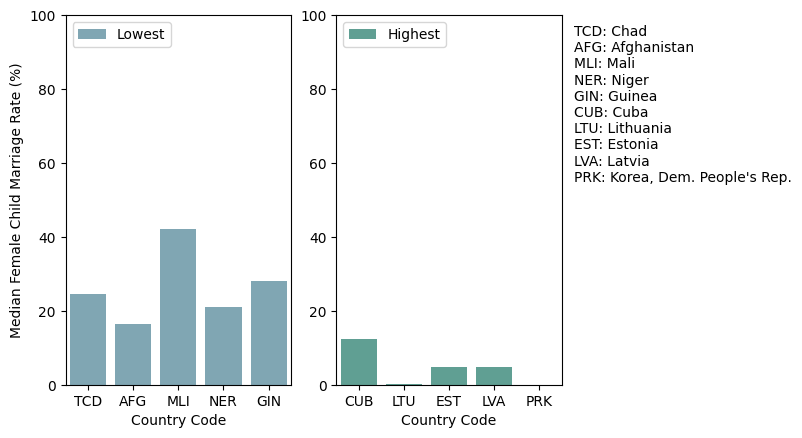

In [38]:
bottom = final_df[final_df["Status"]=="Lowest"] # bottom five
top = final_df[final_df["Status"]=="Highest"] # top five

plt.subplot(1,2,1) # make a plot with one row and two columns - the first graph is below:
sns.barplot(data=bottom, x="Country Code", y="Median Female Child Marriage Rate (%)",  color='#7AB', label="Lowest") # label gets added to the legend box
plt.ylim(0, 100) # manipulate the length of the y-axis
plt.legend(loc="upper left") # re-locate the legend box
plt.subplot(1,2,2) # the second graph is below:
sns.barplot(data=top, x="Country Code", y="Median Female Child Marriage Rate (%)", color='#5A9', label="Highest")
plt.ylim(0, 100)
plt.ylabel('') # remove the y-label for the second graph
plt.legend(loc = "upper left")
plt.gcf().text(0.92, 0.5, code_to_name, fontsize=10) # add our text variable to the figure - the numbers are the figure coordinates (where to place the text). 

From the graph above, we can see that child marriage is lower in the top five countries with the highest adult female literacy rate, compared to the bottom five countries. 

## Saving the Clean Data

Write the final DataFrame to csv:

In [39]:
final_df.to_csv("2.first-merge-fl-cm.csv", index=False) # fl stands for female literacy, cm stands for child marriage


Read it back in to check that it works properly:

In [40]:
test = pd.read_csv("2.first-merge-fl-cm.csv") 
test

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%)
0,Chad,TCD,Lowest,15.379128,24.5560
1,Afghanistan,AFG,Lowest,19.809310,16.3000
2,Mali,MLI,Lowest,20.470424,42.1000
3,Niger,NER,Lowest,20.530956,21.1555
4,Guinea,GIN,Lowest,22.271088,28.1000
5,Cuba,CUB,Highest,99.769315,12.3620
6,Lithuania,LTU,Highest,99.777059,0.1500
7,Estonia,EST,Highest,99.849846,4.8805
8,Latvia,LVA,Highest,99.858515,4.8805
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.0500
